In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
import scipy.interpolate
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
data_directory = '../src/flex_op/src/airfoil_polars/'

In [3]:
def get_alpha_cl0(aoa, cl):
    interpolator = (scipy.interpolate.interp1d(cl,
                               aoa,
                               kind='quadratic',
                               copy=False,
                               fill_value='extrapolate',
                               assume_sorted=False))
    return interpolator

def get_cd_at_cl(cl, cd):
    interpolator = (scipy.interpolate.interp1d(cl,
                               cd,
                               kind='quadratic',
                               copy=False,
                               fill_value='extrapolate',
                               assume_sorted=False))
    return interpolator

def get_cd_min(cd, cl):
    poly = np.polyfit(cl, cd, deg=2)
#     dcldcd = 2 * poly[0] * cd + poly[1]
    cdmin = -poly[1] / 2 / poly[0]
    return cdmin

In [4]:
def plot_polar(alpha_rad, cl, cd, cm, figax=None, lsargs=None, **kwargs):
    if figax is None:
        fig, ax = plt.subplots(ncols=3, **kwargs)
    else:
        fig, ax = figax

    alpha_deg = alpha_rad * 180 / np.pi

    ax[0].plot(alpha_deg, cl, **lsargs)
    ax[1].plot(alpha_deg, cd, **lsargs)
    ax[2].plot(alpha_deg, cm, **lsargs)

    for a in ax:
        a.set_xlabel('Angle of Attack, deg')
    ax[0].set_ylabel('Lift Coefficient, Cl')
    ax[1].set_ylabel('Drag Coefficient, Cd')
    ax[2].set_ylabel('Pitching Moment Coefficient, Cm')
    plt.tight_layout()
    
    # Info
    cla = np.polyfit(alpha_deg * np.pi / 180, cl, deg=1)[0]
    print(f'Lift curve slope: {cla:.4f} /rad')
    cd0 = get_cd_at_cl(cl, cd)(0)
    print(f'Cd0 {cd0:.4f}')
    
    cma = np.polyfit(alpha_deg * np.pi / 180, cm, deg=1)[0]
    print(f'Pitching moment curve slope CMa: {cma:.4f} /rad')
    return fig, ax

In [5]:
def load_polar(filename):
    data = np.loadtxt(filename)
    aoa_rad = data[:, 0] * np.pi / 180
    cl = data[:, 1]
    cd = data[:, 2]
    cm = data[:, 3]
    return aoa_rad, cl, cd, cm

def load_deflection(filename):
    data = np.loadtxt(filename)
    aoa = data[:, 0]
    deflection = data[:, 1:]
    return aoa, deflection

In [6]:
polar_data = [
    {'fname': 'xfoil_seq_re1300000_root.txt',
    'name': 'root'},
    {'fname': 'xfoil_seq_re1300000_tip.txt',
    'name': 'tip'},
    {'fname': 'xfoil_seq_re1300000_naca0012.txt',
    'name': 'naca0012'}
]

Lift curve slope: 6.4243 /rad
Cd0 0.0088
Pitching moment curve slope CMa: -0.0221 /rad
(viscous) Zero-lift angle of attack -3.8060 deg
Lift curve slope: nan /rad
Cd0 nan
Pitching moment curve slope CMa: nan /rad
(viscous) Zero-lift angle of attack nan deg
Lift curve slope: 6.2513 /rad
Cd0 0.0053
Pitching moment curve slope CMa: 0.0481 /rad
(viscous) Zero-lift angle of attack 0.0000 deg


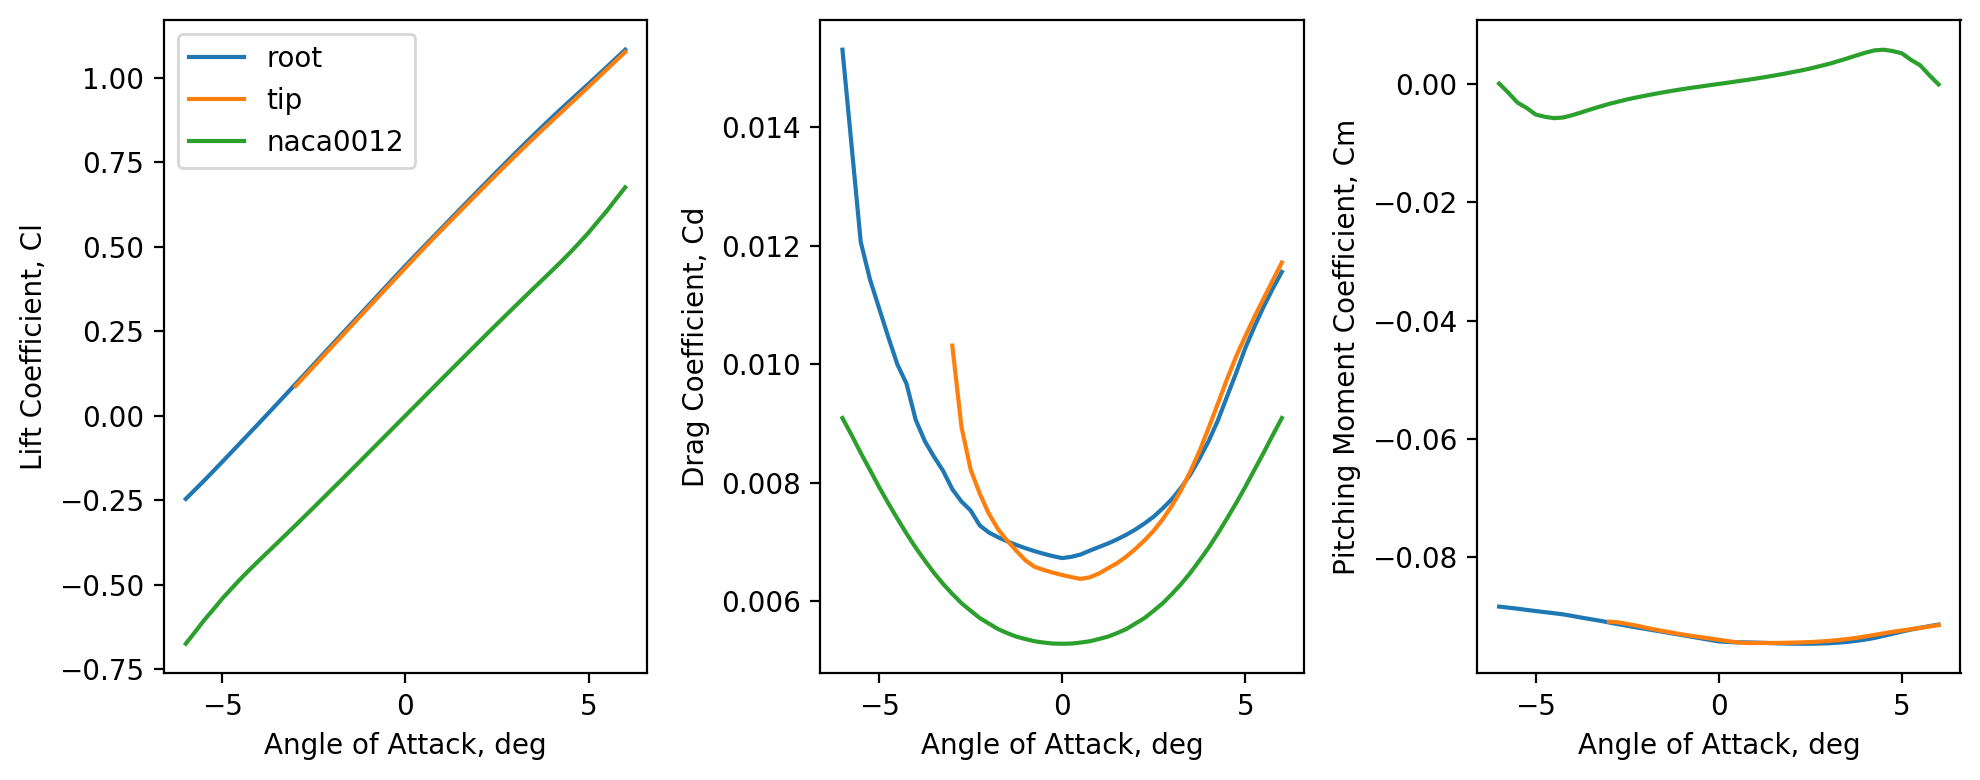

In [7]:
for ith, polar in enumerate(polar_data):
#     fig, ax = plot_polar(*load_polar(data_directory + polar['fname']), figsize=(10, 4))
#     fig.suptitle(polar['name'])
    lsargs = {'label': polar['name']}
    aoa_rad, cl, cd, cm = load_polar(data_directory + polar['fname'])
    if ith == 0:
        fig, ax = plot_polar(aoa_rad, cl, cd, cm, figsize=(10, 4), lsargs=lsargs)
    else:
        fig, ax = plot_polar(aoa_rad, cl, cd, cm, figax=(fig, ax), lsargs=lsargs)
    print(f'(viscous) Zero-lift angle of attack {get_alpha_cl0(aoa_rad * 180 / np.pi, cl)(0):.4f} deg')
ax[0].legend()

# FlexOp Aircraft Polars

## Convergence on polar data - UVLM only

In [8]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 12160 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 20, n_elem = 4, 46080 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W20n4'}})

cases.append({'filename': 'seq_flexop_w10n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 4, 23040 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W10n4'}})

Lift curve slope: 4.6402 /rad
Cd0 0.0000
Pitching moment curve slope CMa: -3.5138 /rad
Lift curve slope: 4.6695 /rad
Cd0 0.0000
Pitching moment curve slope CMa: -3.5382 /rad
Lift curve slope: 4.7173 /rad
Cd0 -0.0000
Pitching moment curve slope CMa: -3.5818 /rad
Lift curve slope: 4.6874 /rad
Cd0 -0.0000
Pitching moment curve slope CMa: -3.5569 /rad


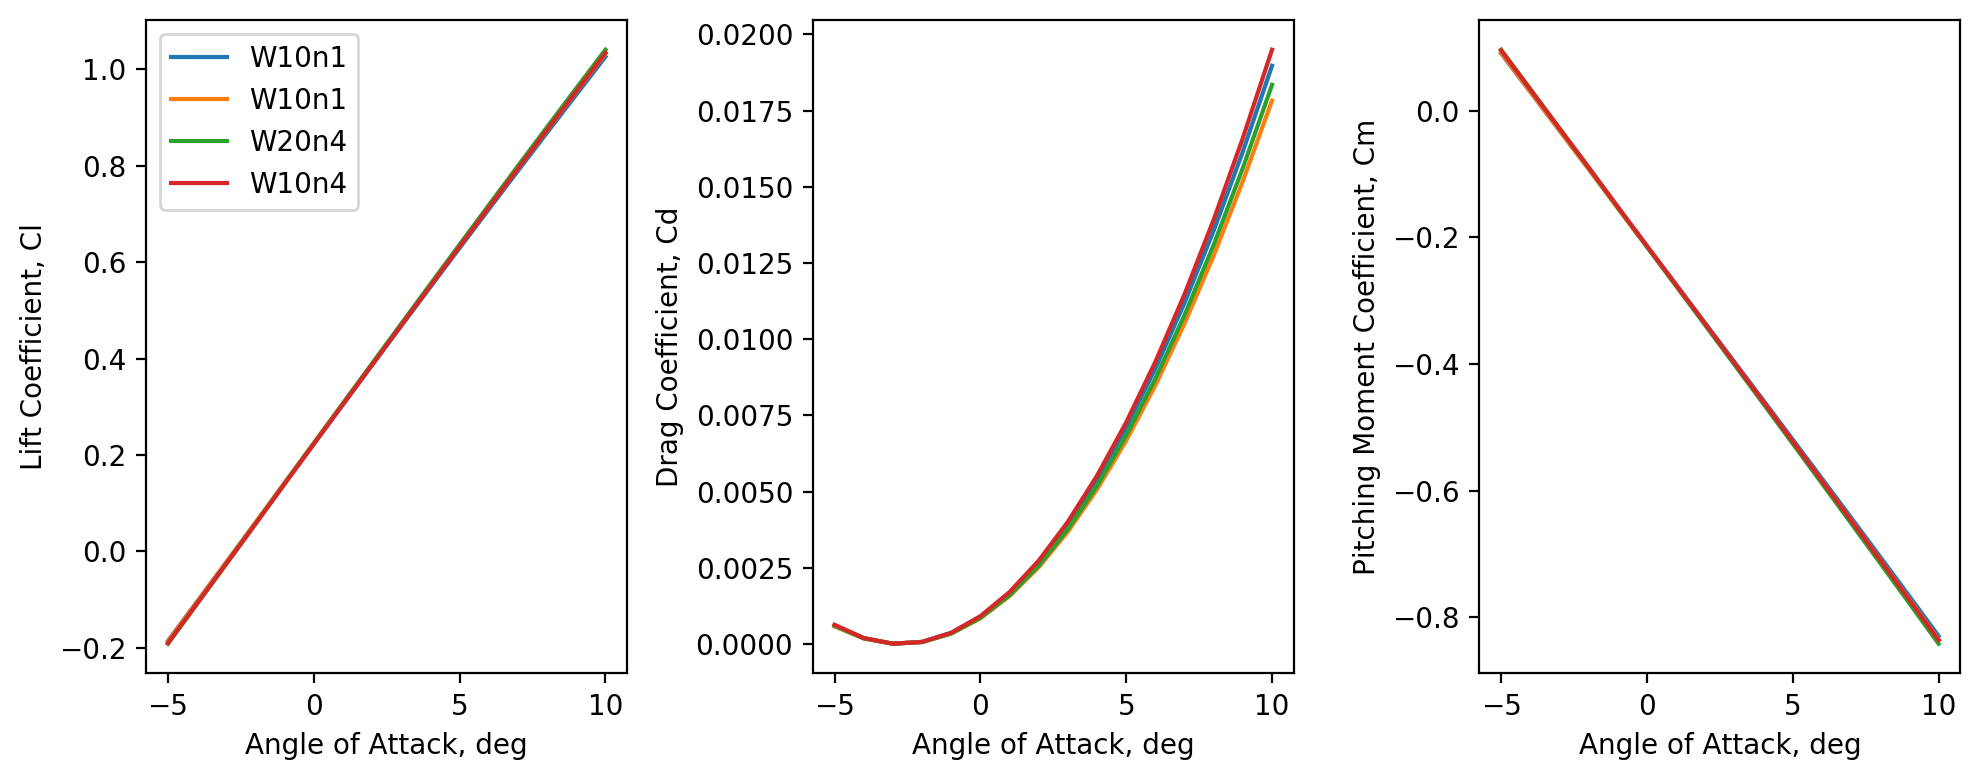

In [9]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

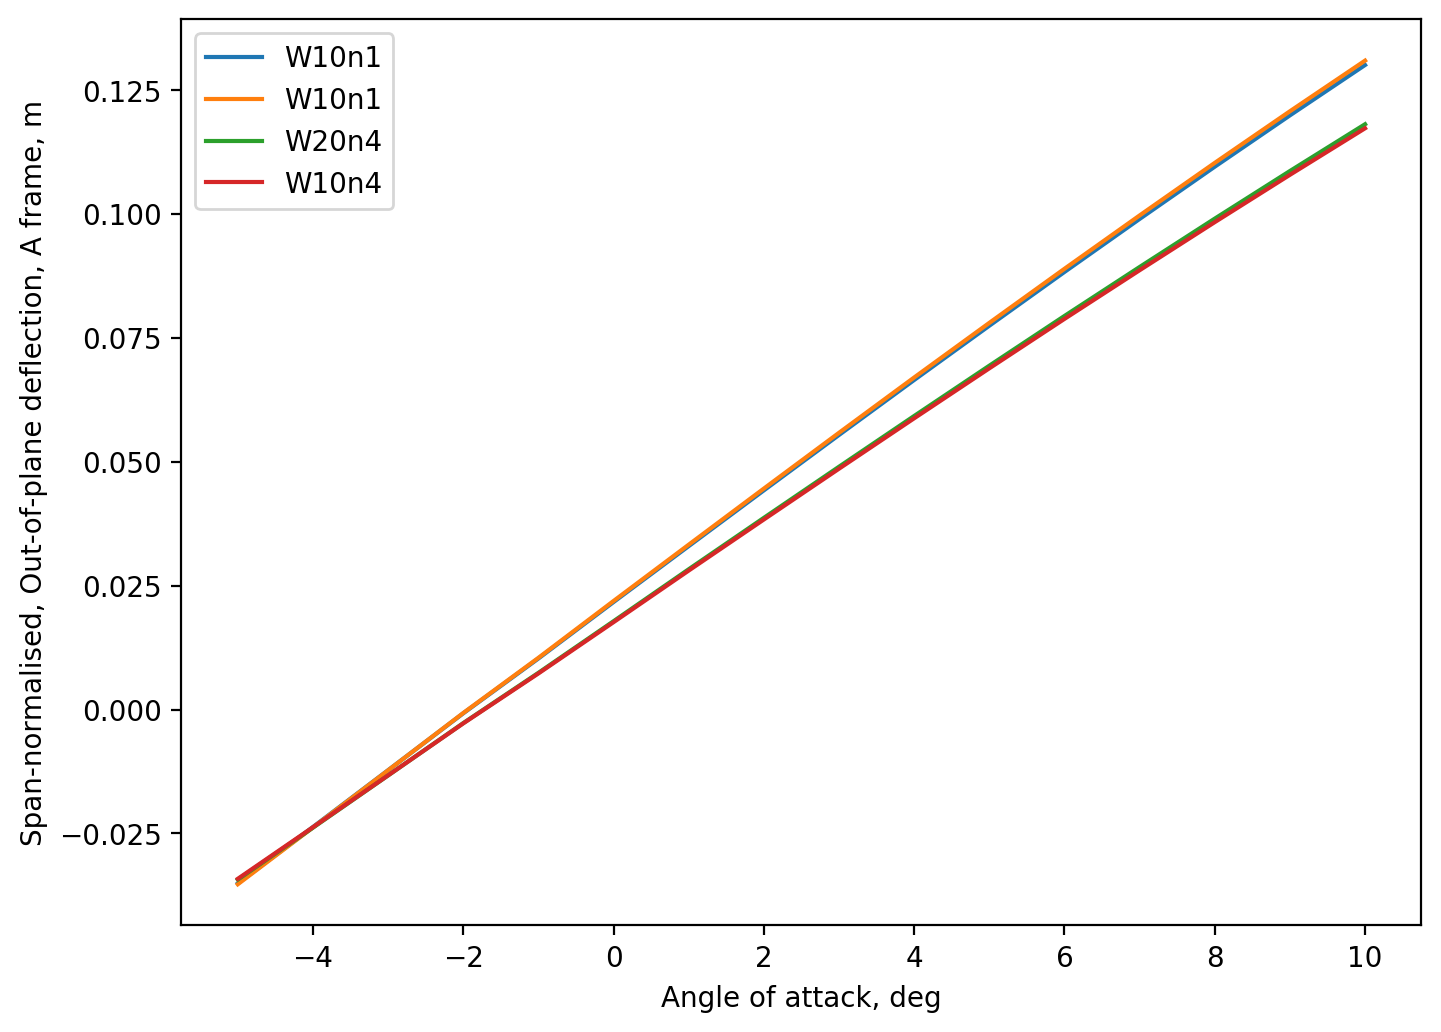

In [10]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

## Convergence on aircraft polar data with polar corrections

In [11]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 12160 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p1_f0.dat',
              'rmk': 'wake length 20, n_elem = 4, 46080 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W20n4'}})

cases.append({'filename': 'seq_flexop_w10n4_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 4, 23040 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W10n4'}})

Lift curve slope: 4.7184 /rad
Cd0 0.0092
Pitching moment curve slope CMa: -3.6276 /rad
Lift curve slope: 4.7458 /rad
Cd0 0.0092
Pitching moment curve slope CMa: -3.6508 /rad
Lift curve slope: 4.8077 /rad
Cd0 0.0093
Pitching moment curve slope CMa: -3.6899 /rad
Lift curve slope: 4.7800 /rad
Cd0 0.0093
Pitching moment curve slope CMa: -3.6670 /rad


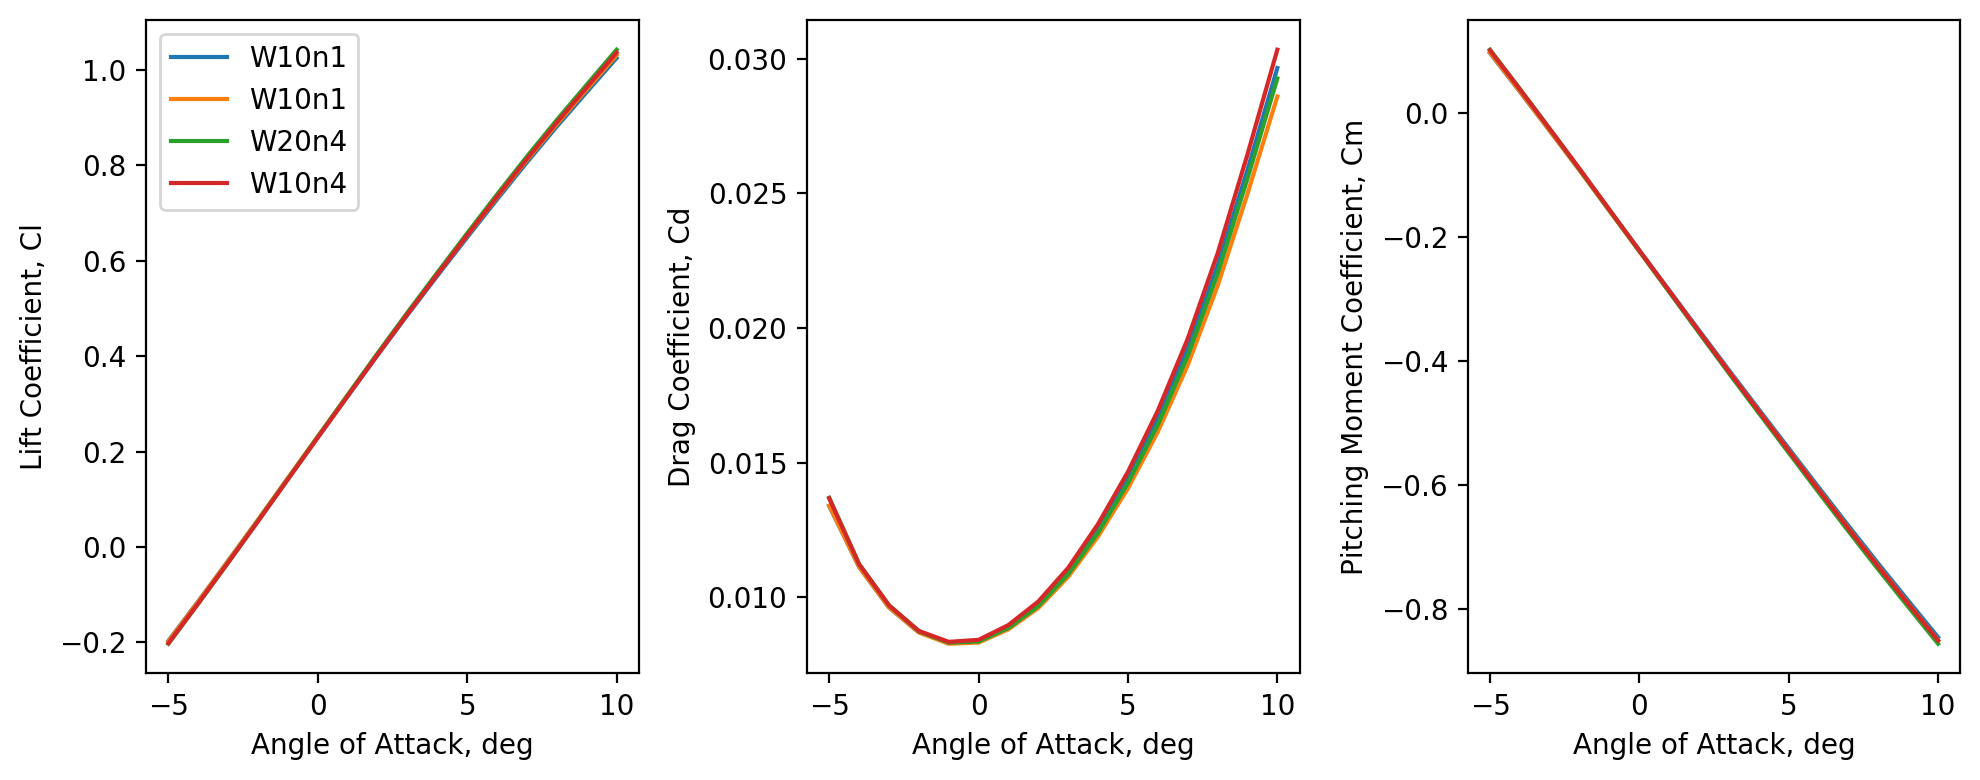

In [12]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

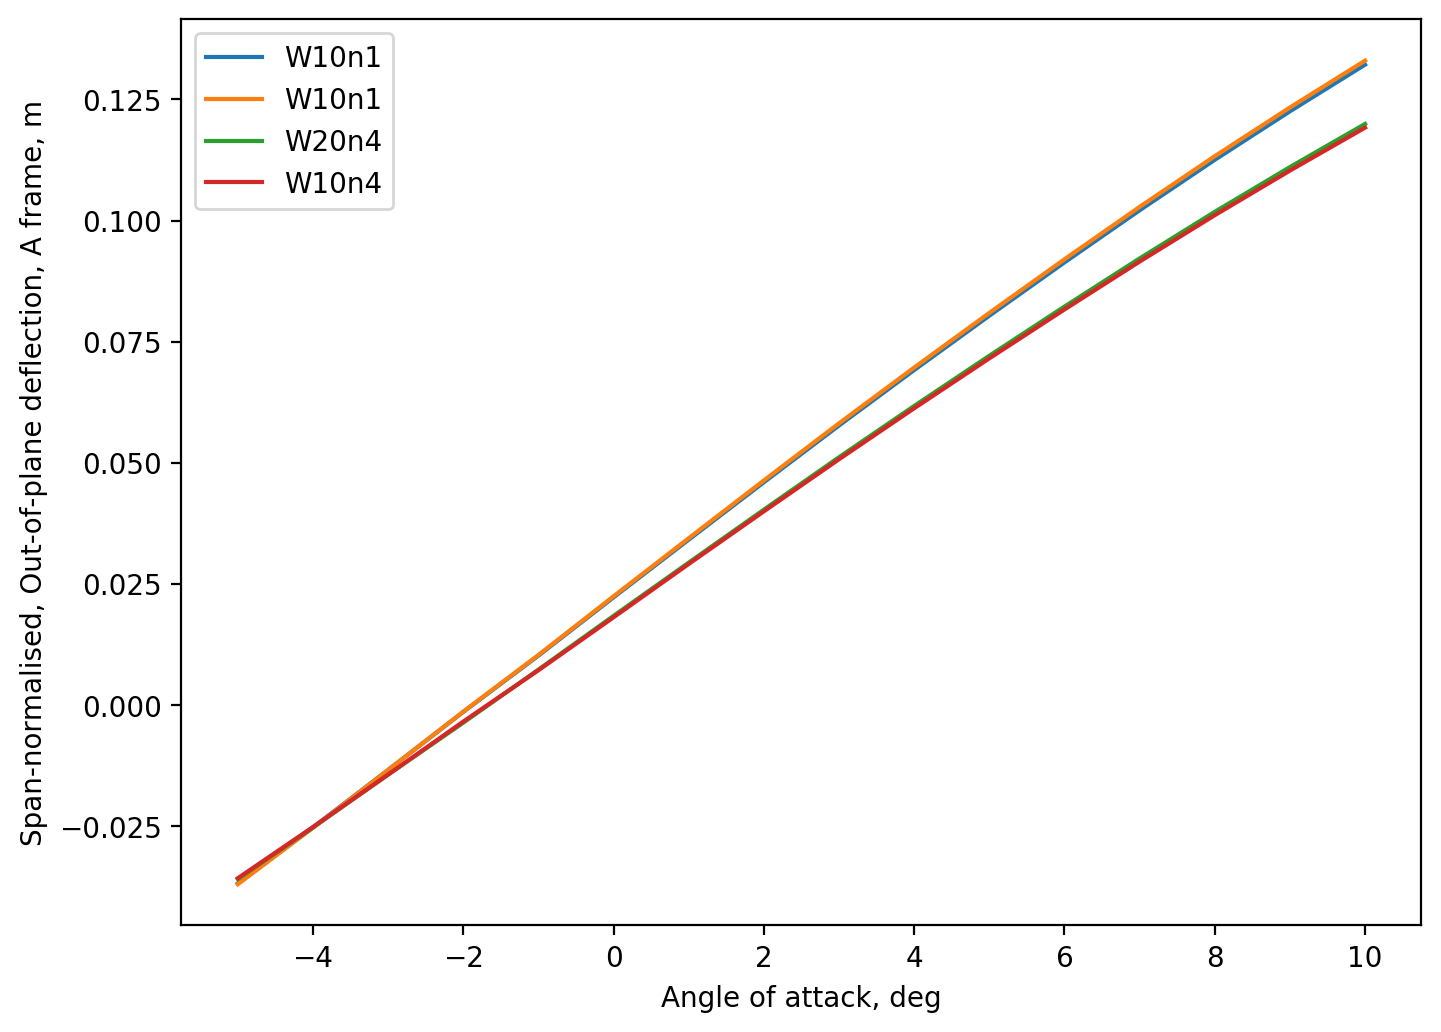

In [13]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

# Polars and UVLM comparison - W10 N1

In [14]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'UVLM'}})

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars'}})

cases.append({'filename': 'seq_flexop_rigid_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars rigid'}})

Lift curve slope: 4.6402 /rad
Cd0 0.0000
Pitching moment curve slope CMa: -3.5138 /rad
Lift curve slope: 4.7184 /rad
Cd0 0.0092
Pitching moment curve slope CMa: -3.6276 /rad
Lift curve slope: 5.1984 /rad
Cd0 0.0092
Pitching moment curve slope CMa: -4.1109 /rad


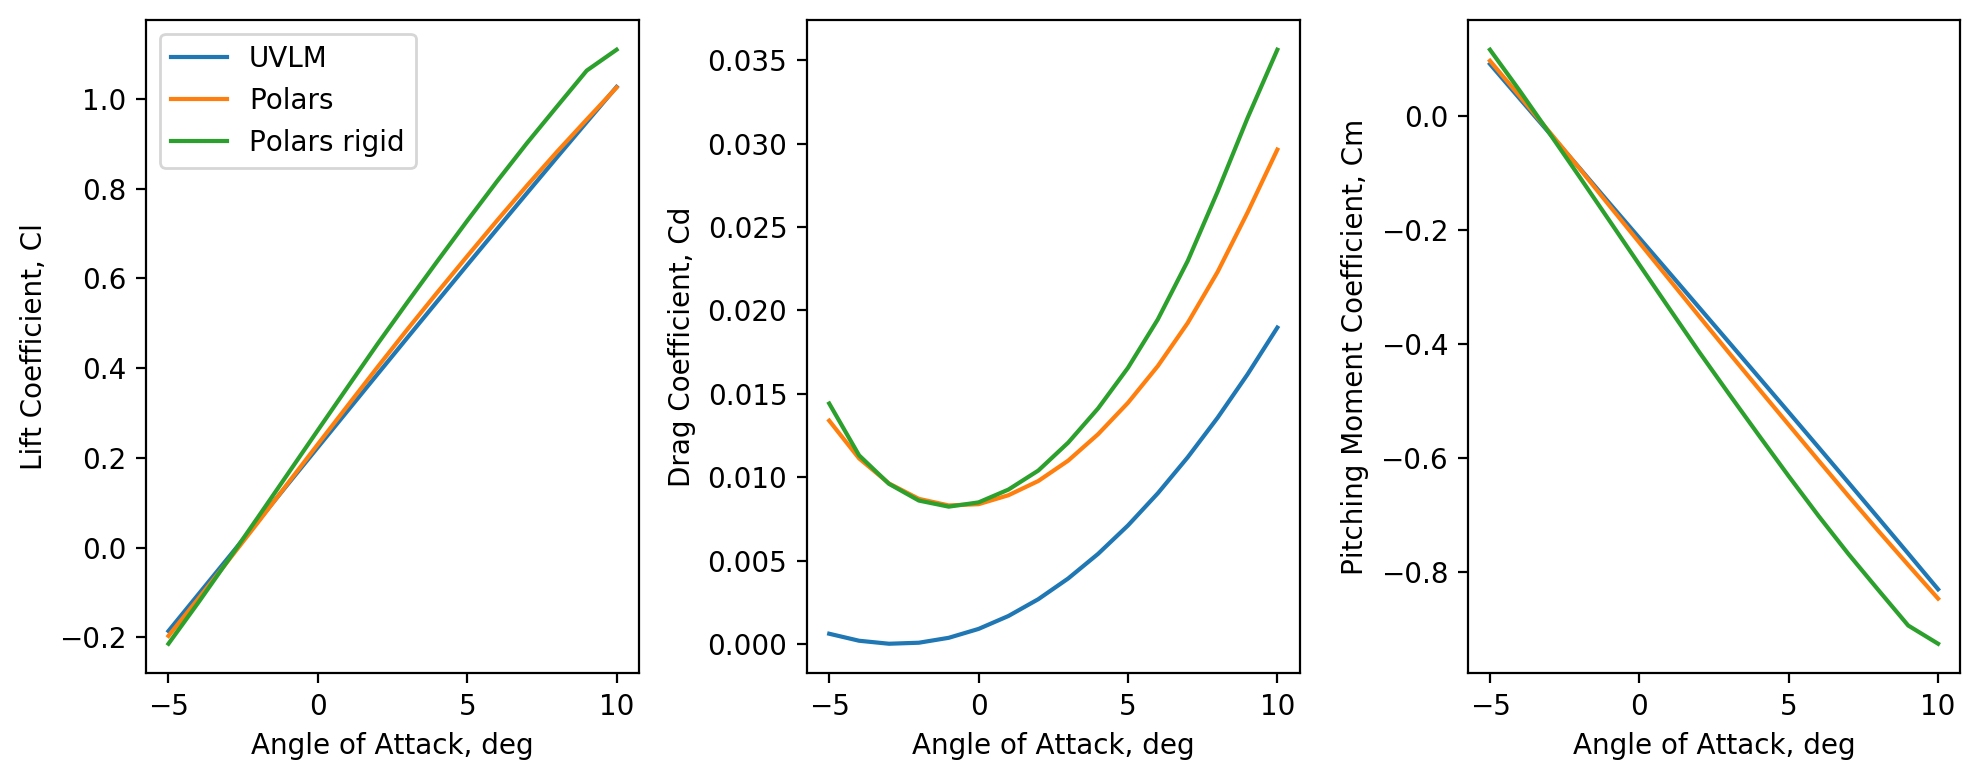

In [15]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

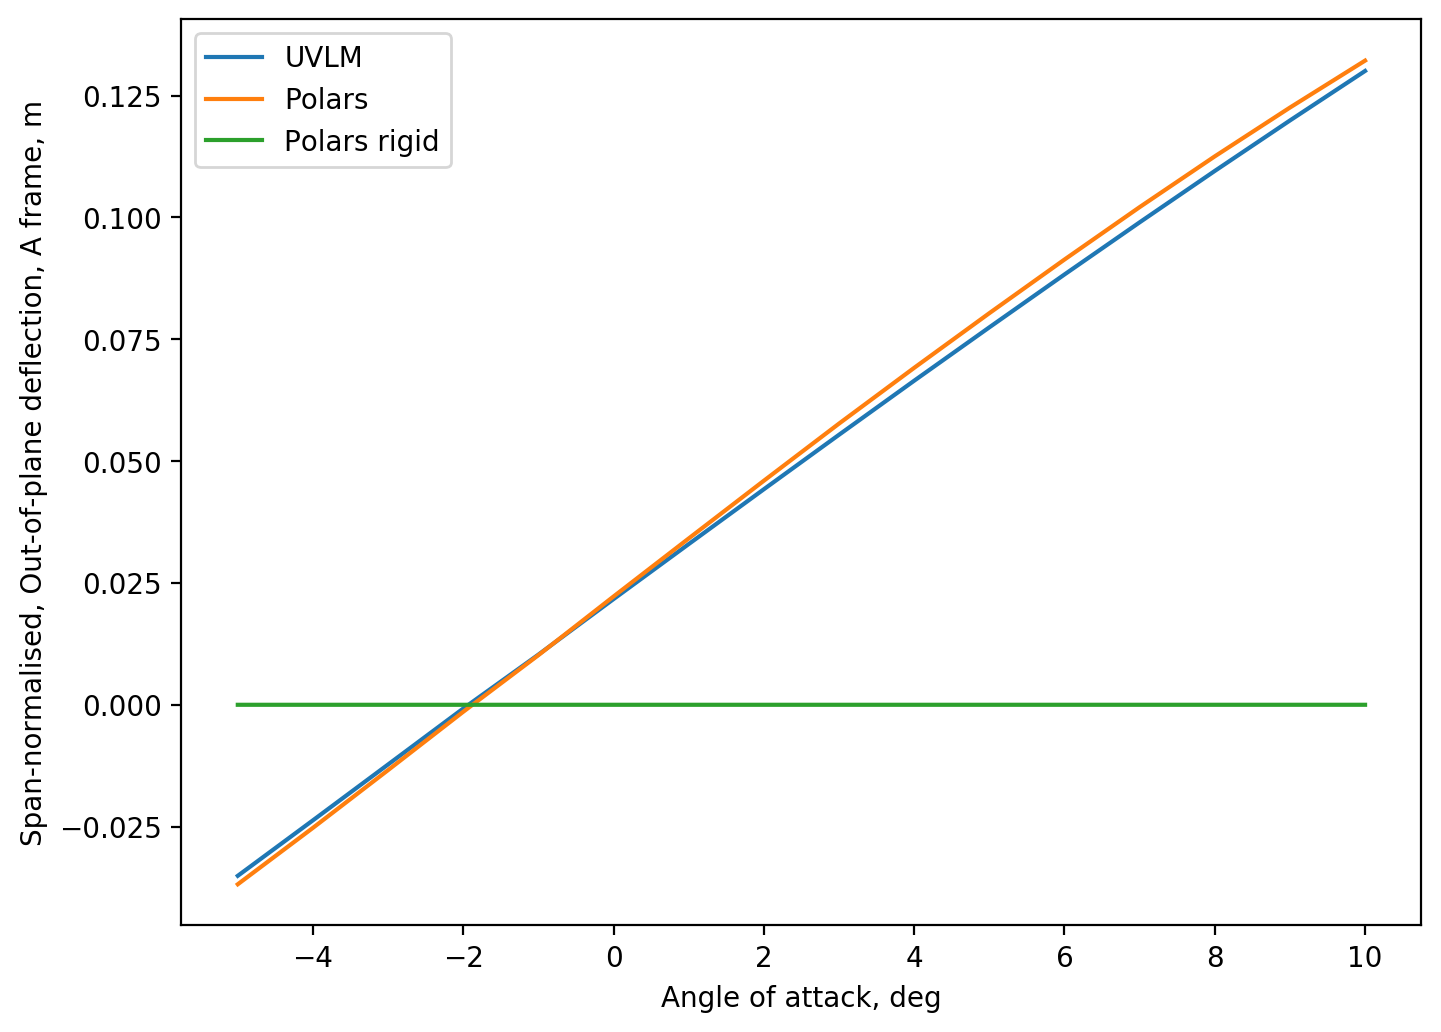

In [16]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

# Polars and UVLM comparison - W20 N4

In [17]:
cases = []

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'UVLM'}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars'}})

cases.append({'filename': 'seq_flexop_rigid_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars rigid'}})

Lift curve slope: 4.7173 /rad
Cd0 -0.0000
Pitching moment curve slope CMa: -3.5818 /rad
Lift curve slope: 4.8077 /rad
Cd0 0.0093
Pitching moment curve slope CMa: -3.6899 /rad
Lift curve slope: 5.1984 /rad
Cd0 0.0092
Pitching moment curve slope CMa: -4.1109 /rad


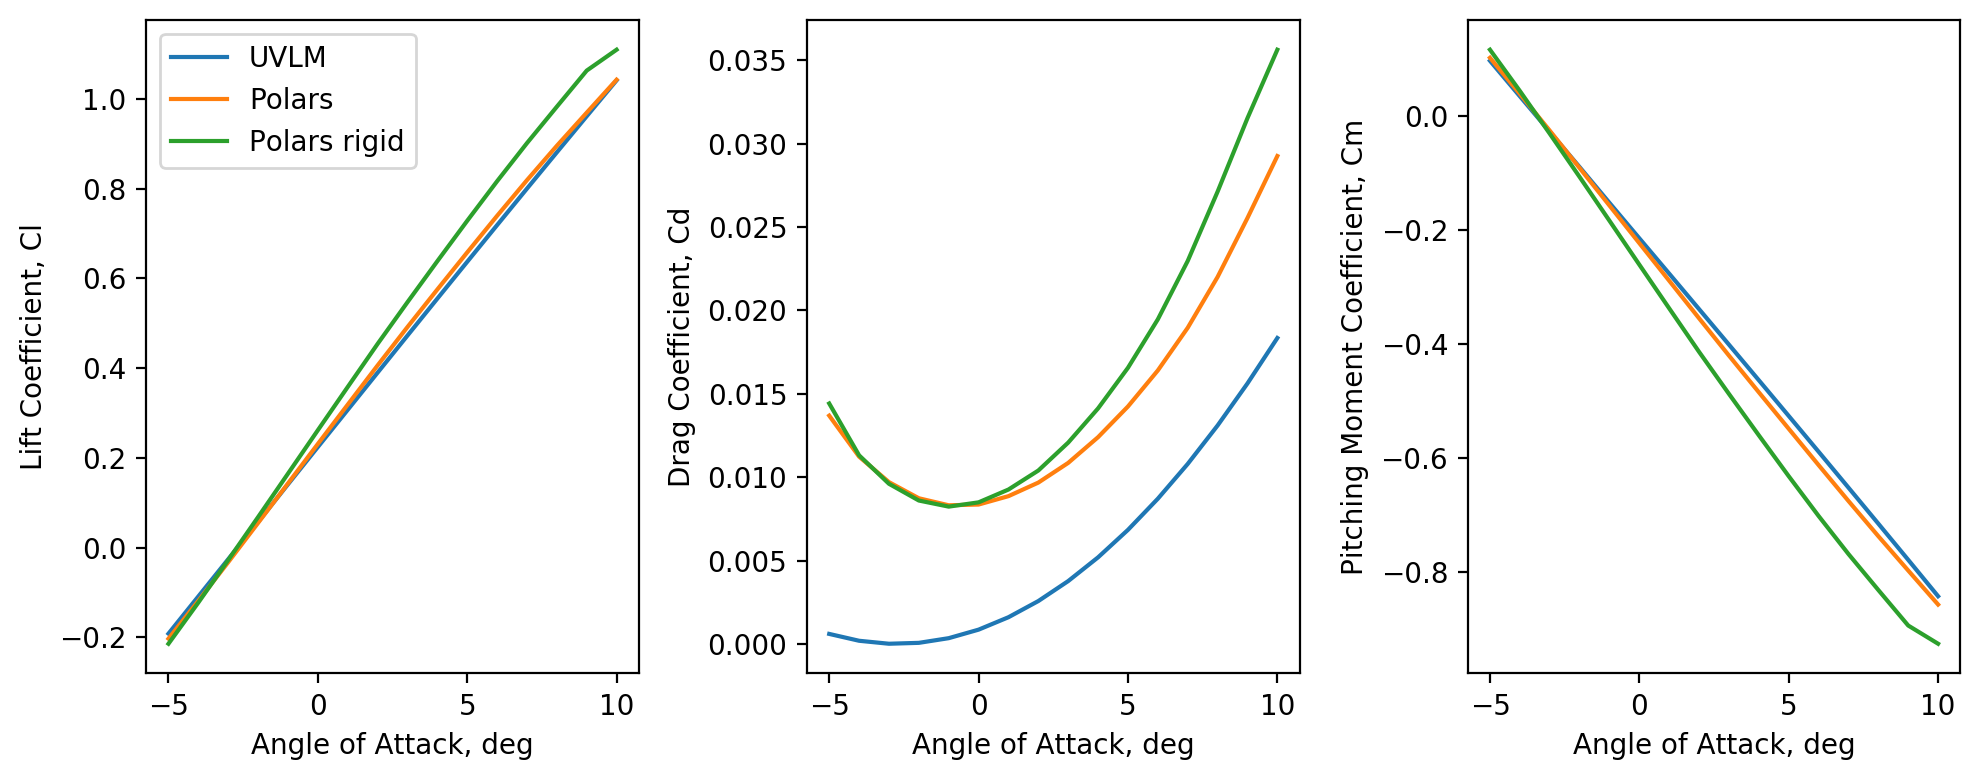

In [18]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

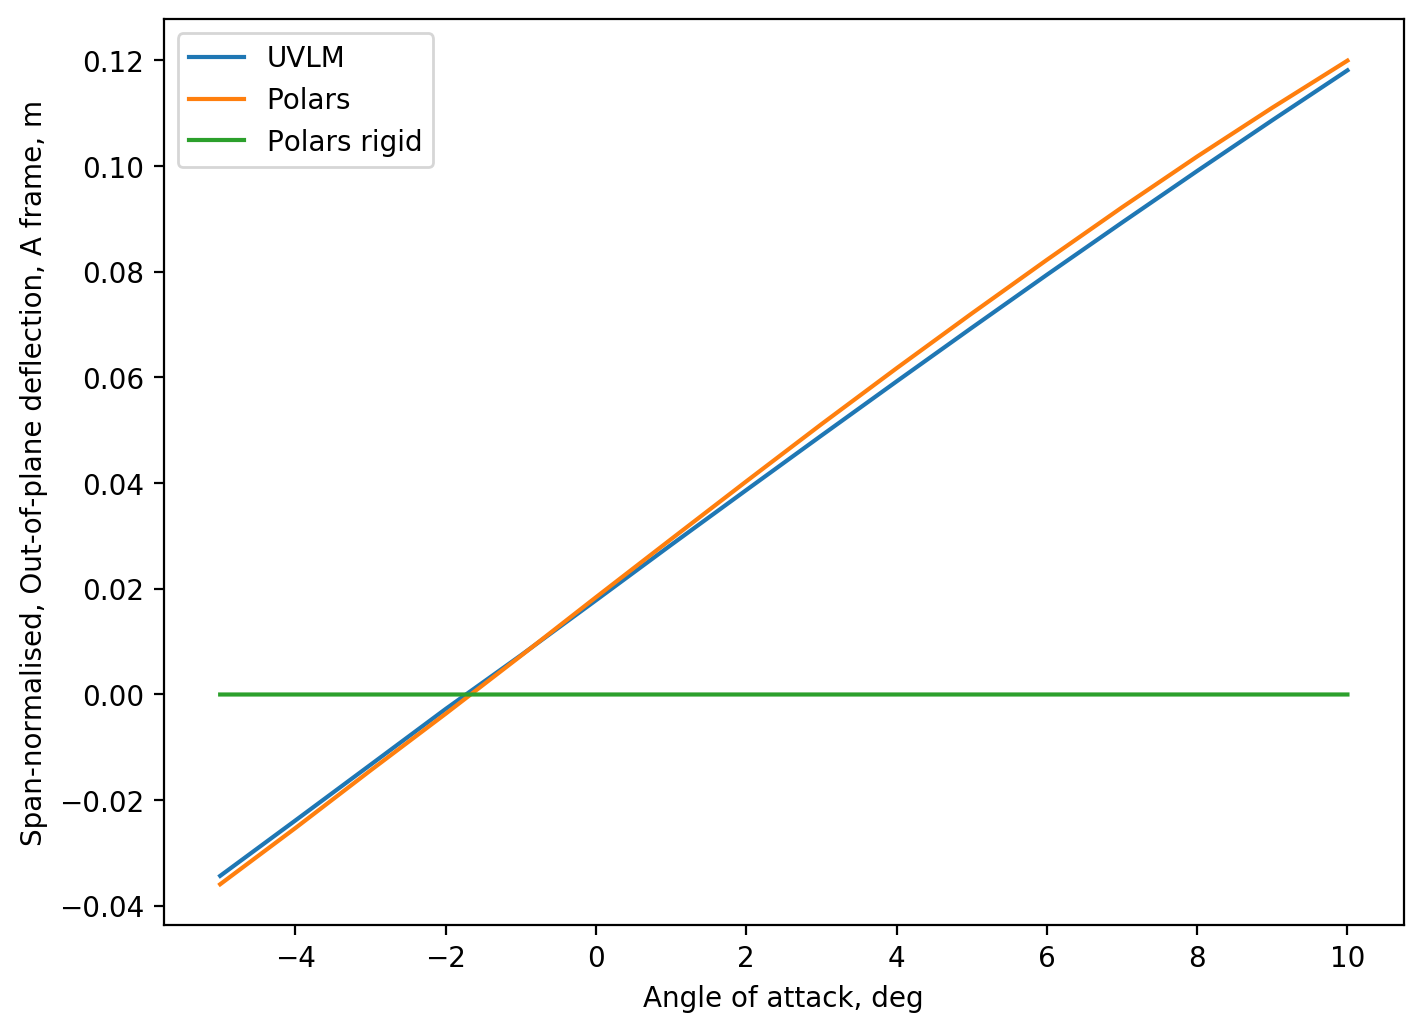

In [19]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

# Fuselage

In [20]:
cases = []

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'UVLM Wing', 'color': 'k', 'lw':1, 'ls':'--'}})

cases.append({'filename': 'seq_flexop_w20n4_m8mf24_uinf0450_p0_f1.dat',
              'rmk': 'wake length 10, n_elem = 1, up to where it failed',
             'lsargs': {'label': 'UVLM Wing + Fuselage', 'lw':1.}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Wing + Polar correction', 'lw':1., 'ls':'--'}})

cases.append({'filename': 'seq_flexop_init_polars_w20n4_m8mf24_uinf0450_p1_f1.dat',
              'rmk': 'wake length 10, n_elem = 1, up to where it failed',
             'lsargs': {'label': 'Wing + Fuselage + Polar correction', 'lw':1.}})



UVLM Wing
Lift curve slope: 4.7173 /rad
Cd0 -0.0000
Pitching moment curve slope CMa: -3.5818 /rad
UVLM Wing + Fuselage
Lift curve slope: 4.5966 /rad
Cd0 -0.0000
Pitching moment curve slope CMa: -3.6764 /rad
Wing + Polar correction
Lift curve slope: 4.8077 /rad
Cd0 0.0093
Pitching moment curve slope CMa: -3.6899 /rad
Wing + Fuselage + Polar correction
Lift curve slope: 4.6878 /rad
Cd0 0.0088
Pitching moment curve slope CMa: -3.7856 /rad


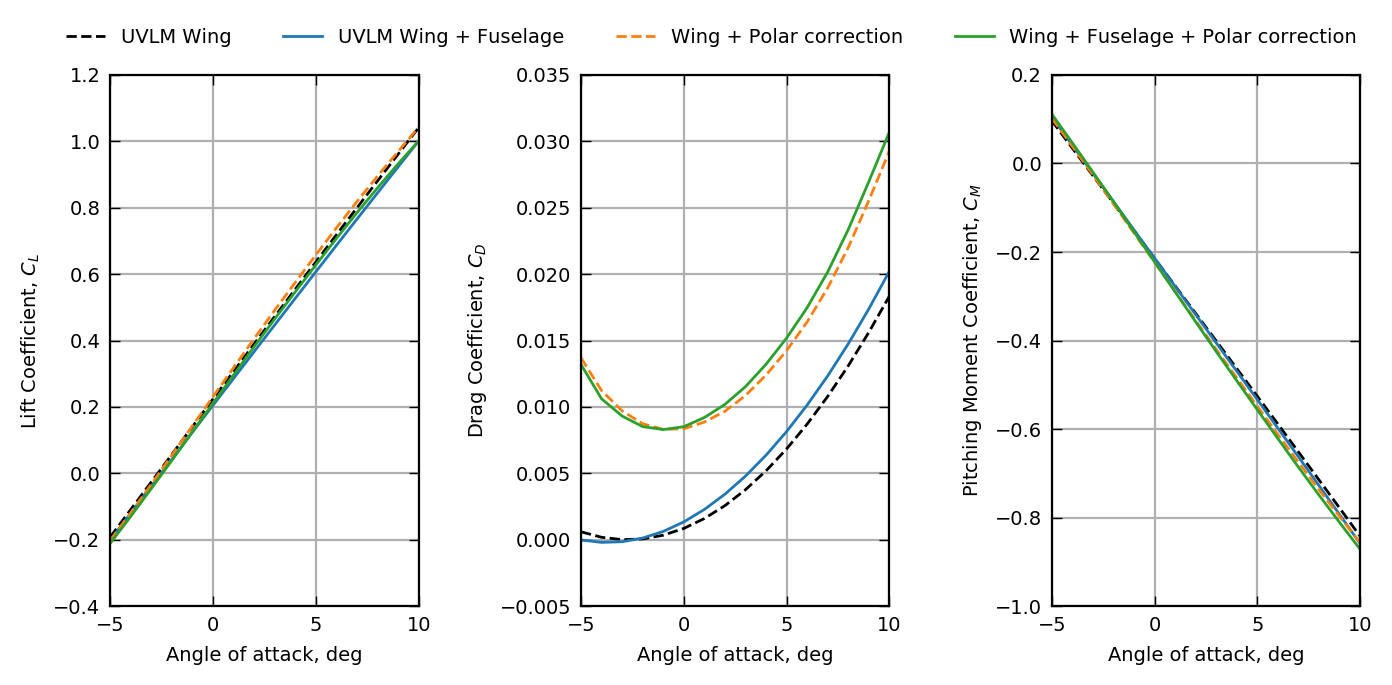

In [21]:
w = 18 / 2.54
h = w * 0.5

for ith, case in enumerate(cases):
    print(case['lsargs']['label'])
    aoa, cl, cd, cm = load_polar('./polar_output_data/' + case['filename'])
    if ith == 0:
        fig, ax = plot_polar(aoa, cl, cd, cm, figsize=(w, h), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(aoa, cl, cd, cm, figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

ax[0].set_xlabel('Angle of attack, deg', fontsize=7)
ax[1].set_xlabel('Angle of attack, deg', fontsize=7)
ax[2].set_xlabel('Angle of attack, deg', fontsize=7)

ax[0].set_ylabel(r'Lift Coefficient, $C_L$', fontsize=7)
ax[1].set_ylabel(r'Drag Coefficient, $C_D$', fontsize=7)
ax[2].set_ylabel(r'Pitching Moment Coefficient, $C_M$', fontsize=7)

ax[0].set_ylim([-0.4, 1.2])
ax[1].set_ylim([-0.005, 0.035])
ax[2].set_ylim([-1, 0.2])

ax[0].legend(frameon=False, bbox_to_anchor=(-0.2,1.02,4.3,0.2), loc="lower left", ncol=4, mode='expand', fontsize=7)

for a in ax:
    a.set_xlim([-5, 10])
    a.set_xticks(np.linspace(-5, 10, 4))
    for tick in a.get_xticklabels(): 
#         tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
        tick.set_fontsize(7)
    
for a in ax:
    a.grid()
    for tick in a.get_yticklabels(): 
#         tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
        tick.set_fontsize(7)
for a in ax:
    a.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
    a.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
    a.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
    a.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)
fig.align_xlabels(ax)
plt.tight_layout()
# plt.savefig('./figures/polar_comparison.pdf')

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

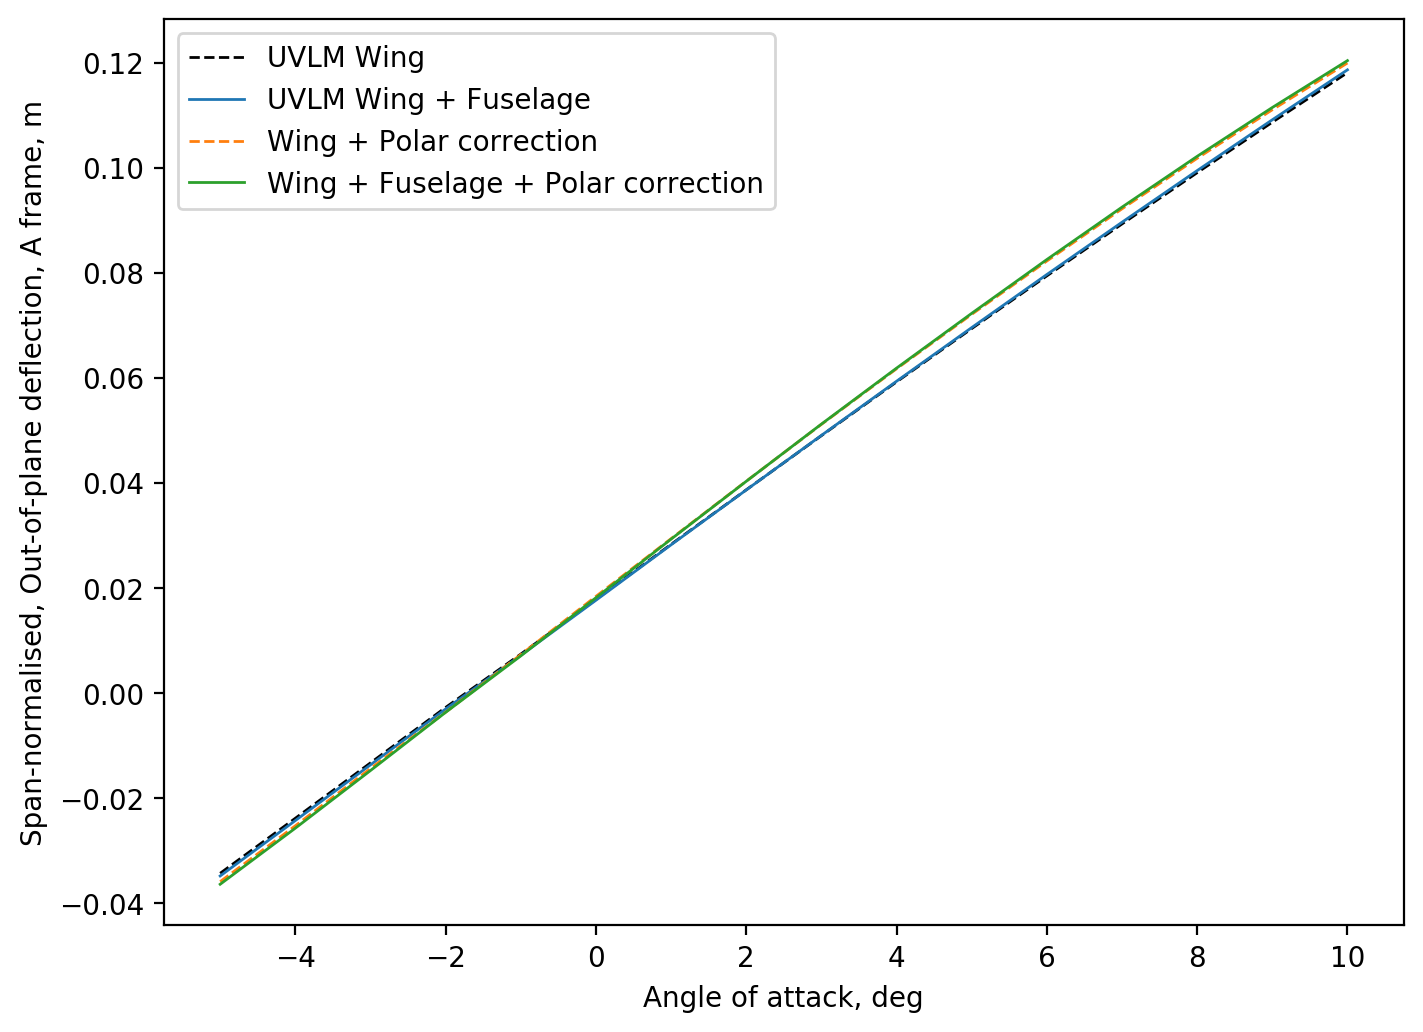

In [22]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

### Aircraft Polar
Untrimmed case, just changing the angle of attack

Zero-lift drag, CD0 = -0.00000
Minimum drag, Cdmin = -0.00000
Zero-lift drag, CD0 = -0.00004
Minimum drag, Cdmin = -0.00021
Zero-lift drag, CD0 = 0.00928
Minimum drag, Cdmin = 0.00830
Zero-lift drag, CD0 = 0.00882
Minimum drag, Cdmin = 0.00833


Text(0, 0.5, 'Lift coefficient, $C_L$')

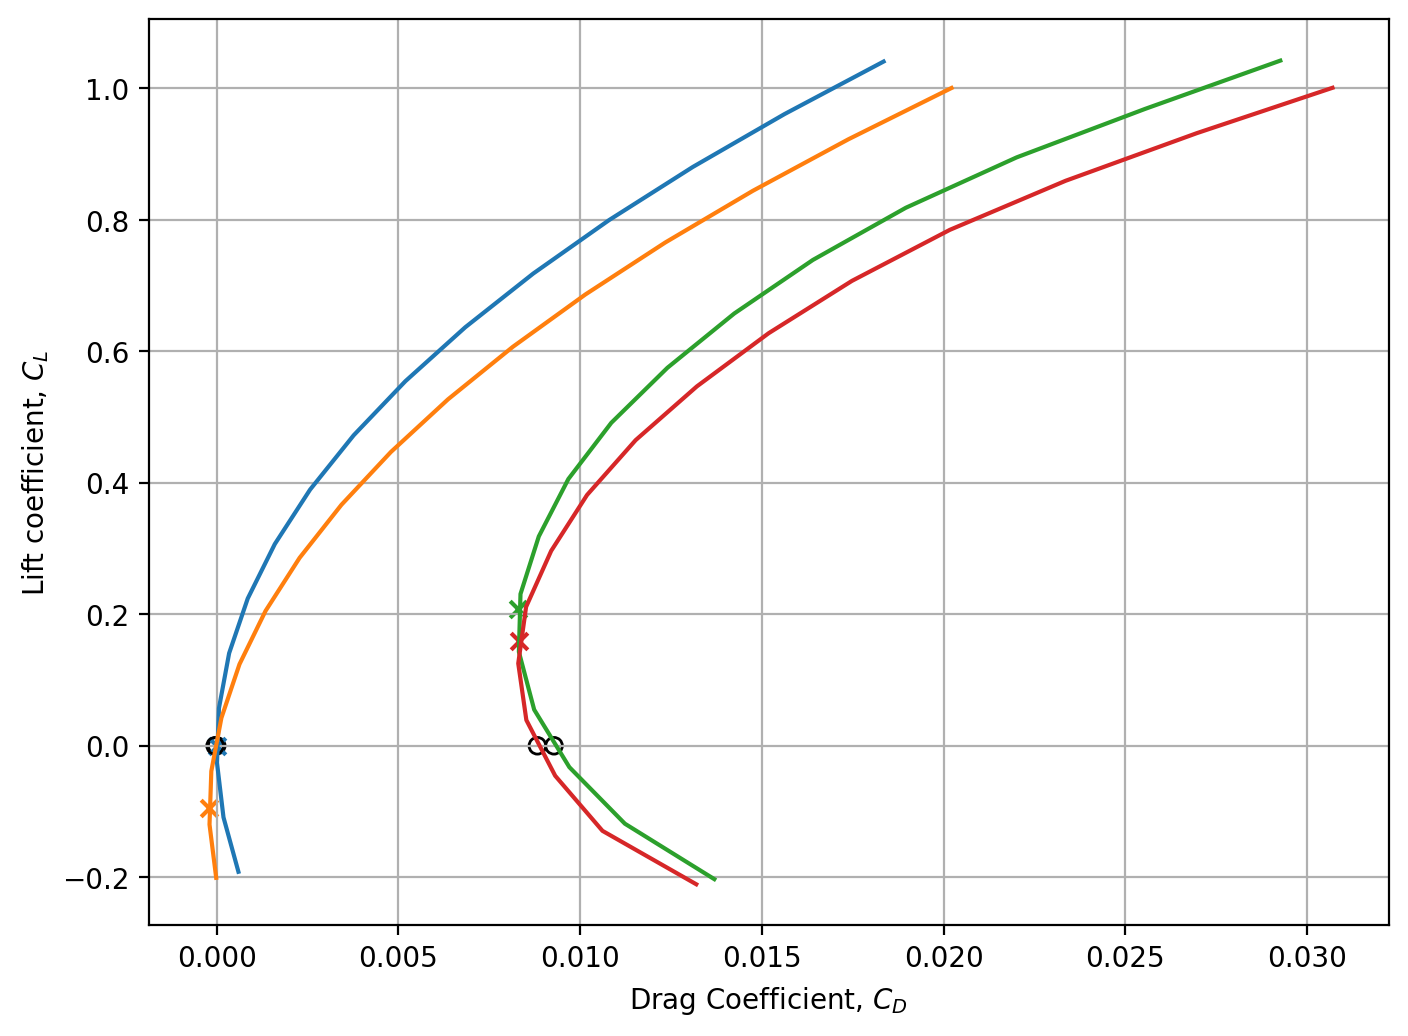

In [23]:
for ith, case in enumerate(cases):
    aoa, cl, cd, cm = load_polar('./polar_output_data/' + case['filename'])
    plt.plot(cd, cl)
    cd0 = get_cd_at_cl(cl, cd)(0)
    print(f'Zero-lift drag, CD0 = {cd0:.5f}')
    clATcdmin = get_cd_min(cd, cl)
    plt.scatter(cd0, 0, marker='o', facecolor='none', edgecolor='k')
    cdmin = get_cd_at_cl(cl, cd)(clATcdmin)
    print(f'Minimum drag, Cdmin = {cdmin:.5f}')
    plt.scatter(cdmin, clATcdmin, marker='x')

plt.grid()
plt.xlabel('Drag Coefficient, $C_D$')
plt.ylabel('Lift coefficient, $C_L$')

# Zero-lift angle of attack because of camber analysis

In [24]:
def load_airfoil_data_from_file(source_directory):
    file = source_directory + "/camber_line_airfoils.csv"
    camber_line = pd.read_csv(file, sep = ";")
    return np.array(camber_line.iloc[:,0]), np.array(camber_line.iloc[:,1])

In [25]:
source_directory = '../src/flex_op/aeroelastic_properties/'
camber_line = load_airfoil_data_from_file(source_directory)

In [26]:
# Recreate panelling as in aerogrid
airfoil_db = (scipy.interpolate.interp1d(camber_line[0],
                               camber_line[1],
                               kind='quadratic',
                               copy=False,
                               fill_value='extrapolate',
                               assume_sorted=True))

In [27]:
m = 32
panels_x = np.linspace(0, 1, m + 1)
panels_z = airfoil_db(panels_x)

In [28]:
# Get alpha_CL0
from sharpy.utils import generate_cases
alpha_0_cl_fine = generate_cases.get_aoacl0_from_camber(camber_line[0], camber_line[1])
alpha_0_cl_panel = generate_cases.get_aoacl0_from_camber(panels_x, panels_z)

print('Refined camber line alpha_0_cl: {:.4f} deg'.format(alpha_0_cl_fine * 180 / np.pi))
print('Panelled camber line alpha_0_cl: {:.4f} deg'.format(alpha_0_cl_panel * 180 / np.pi))

Refined camber line alpha_0_cl: -3.8538 deg
Panelled camber line alpha_0_cl: -3.0010 deg


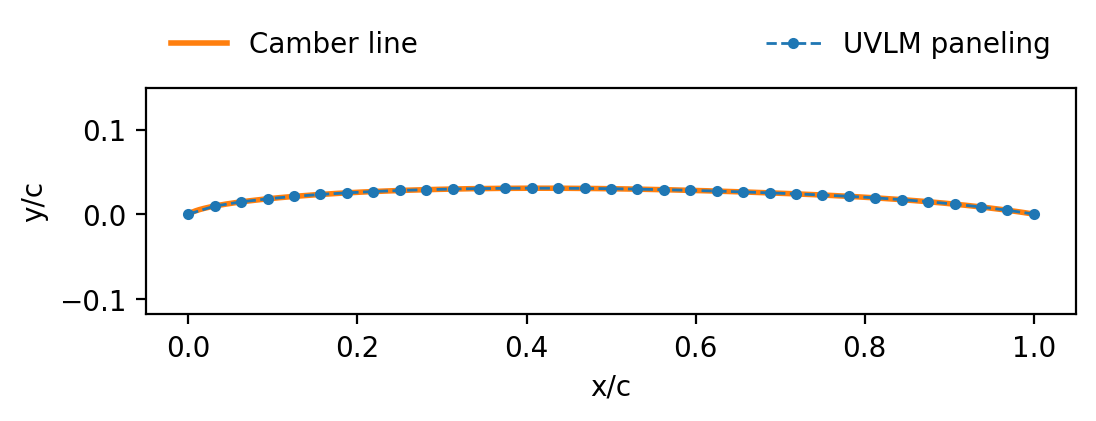

In [29]:
fig = plt.figure(figsize=(6, 1.5))
ax = plt.gca()
plt.plot(camber_line[0], camber_line[1], lw=2, color='tab:orange', label='Camber line')
plt.plot(panels_x, panels_z, marker='o', ms=3, lw=1, ls='--', label='UVLM paneling')
# plt.legend()
ax.legend(frameon=False, bbox_to_anchor=(0.,1.02,1.,0.2), loc="lower left", ncol=2, mode='expand')
plt.xlabel('x/c')
plt.ylabel('y/c')
plt.axis('equal');